<a href="https://colab.research.google.com/github/kejsida33/kejsis/blob/master/Laborator_2_Koci_Kejsi_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
import scipy.fftpack
from scipy import signal
from scipy.stats import kurtosis, skew

#Încărcarea datelor în colaboratory
Din diferite surse:
- google drive
- local drive
- **github**

Folosind comanda git clone se va incarca tot continutul repositoriului github.

In [2]:
!ls

sample_data


# Descrierea fișierelor incluse
- **variables.mat**


> date pentru a demonstra conceptele teoretice: reprezentarea in timp si frecvență, extragere trăsături

```
data60 - semnal sinusoidal de 60Hz
data5Mix60 - semnal cu frecvențe mixte
```

- **S1.mat**


> exemple semnal EEG extrase din baza de date eldBeta

Type: dict
EEG - contine datele inregistrate
Suppl_info
- SID
- Varsta
- Sex
- Canal inregistrate (numar, coordonate, denumire)
- Frecventa de stimulare
- Indice de calitate semnal




























#Citirea datelor din fișier
- .csv
- .xls/.xlsx
- .txt
- .jpeg
- .h5 (hdf5 files)
- .pyc (pickle files)
- **.mat**

Pentru datele .mat - librăria scipy.io
*sio.loadmat('path to file')*

Datele sunt stocare într-o variabilă de tip dictionar.
Pentru a vedea variabilele incluse in dictionar


In [4]:
#citirea datelor din fișiere .mat -> variabilă de tip dictionar
mat_contents = sio.loadmat('variables.mat')
type(mat_contents)

dict

In [5]:
#vizualizarea variabilelor incluse în dictionar - dict.keys()
print(mat_contents.keys())


dict_keys(['__header__', '__version__', '__globals__', 'data5Mix60', 'data60', 'fs'])


In [6]:
#accesarea variabilelor din dictionar - dict['variabila']
print(mat_contents['fs'])


fs = mat_contents['fs']
print(fs)
print(type(fs))

[[512]]
[[512]]
<class 'numpy.ndarray'>


#Reprezentarea datelor în timp
Vizualizarea semnalelor digitale in domeniul timp

Numărul de eșantioane:384


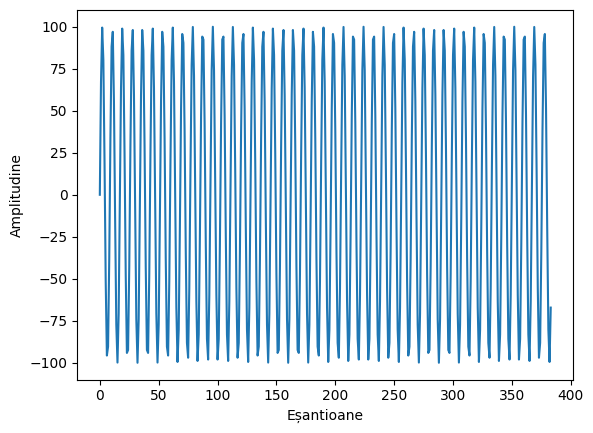

In [7]:
#se accesează semnalul sinusoidal de 60Hz
data60 = mat_contents['data60']

#numărul de eșantioane - lungimea vectorului data60
print('Numărul de eșantioane:' + str(len(data60)))

#reprezentarea grafică a semnalului
plt.figure()
plt.plot(data60)
plt.xlabel('Eșantioane')
plt.ylabel('Amplitudine')
plt.show()

In [8]:
#perioada de eșantionare
dt = 1/fs
print('Perioada de esantionare: ' +str(dt))

#vectorul timp
t = np.arange(0.0, (len(data60))/fs, 1/fs)

#dimensiunea vectorului timp si a semnalului trebuie sa fie aceiasi
print(t.shape)
print(data60.shape)



Perioada de esantionare: [[0.00195312]]
(384,)
(384, 1)


<ipython-input-8-a13dd8422c65>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t = np.arange(0.0, (len(data60))/fs, 1/fs)


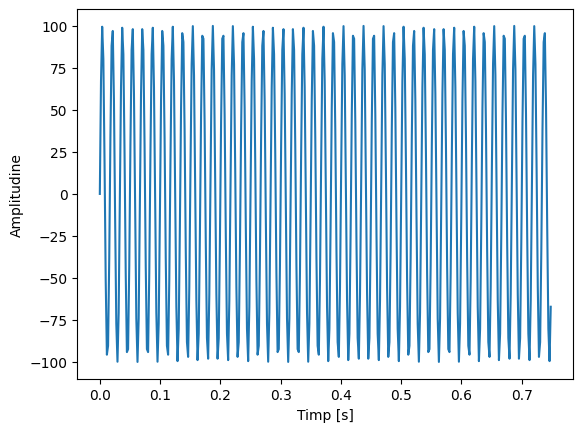

In [9]:
#reprezentarea în domeniul timp
plt.figure()
plt.plot(t,data60)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

#Exercițiu 1
Încărcați semnalul data5Mix60.

1.   Câte eșantioane are semnalul data5Mix60?
2.   Reprezentați semnalul în timp. Perioada de eșantionare este de *0.00195312*






Nr de esantioane al semnalului data5Mix60: 384
Perioada de esantionare: 0.00195312


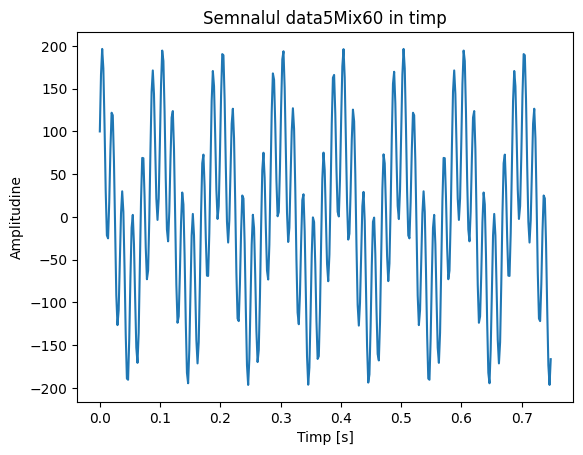

In [10]:
# Incarcare
data5Mix60 = mat_contents['data5Mix60']

num_samples = len(data5Mix60)
print("Nr de esantioane al semnalului data5Mix60:", num_samples)

# Perioada
dt = 0.00195312  # perioada de eșantionare dată
print("Perioada de esantionare:", dt)


t = np.arange(0.0, num_samples * dt, dt)
plt.figure()
plt.plot(t, data5Mix60)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnalul data5Mix60 in timp')
plt.show()


#Reprezentarea în domeniul frecvență
Transformata Fourier Discretă
semnal timp -> fft -> semnal frecvență


Folosind librăria numpy
```
yf = np.fft.rfft(y) # partea reală și positivă a transformatei Fourier
xf = np.fft.rfftfreq(len(y),1/fs) #vectorul frecvență reală
```

```
yf = np.fft.fft(y) #include și partea simetrică a transformatei
xf = np.fft.fftfreq(len(y),1/fs) #vectorul frecvență corespunzător
```

Folosind librăria scipy
```
yf = scipy.fftpack.fft(y) #reprezentarea în frecvență
xf = np.linspace(0, fs/2,len(y)) #vectorul frecvență
```






In [11]:
y = data60

#remodelarea datelor pentru functia numpy fft
print(y.shape)
y = np.reshape(y,(len(y),))
print(y.shape)

(384, 1)
(384,)


(193,)
(193,)


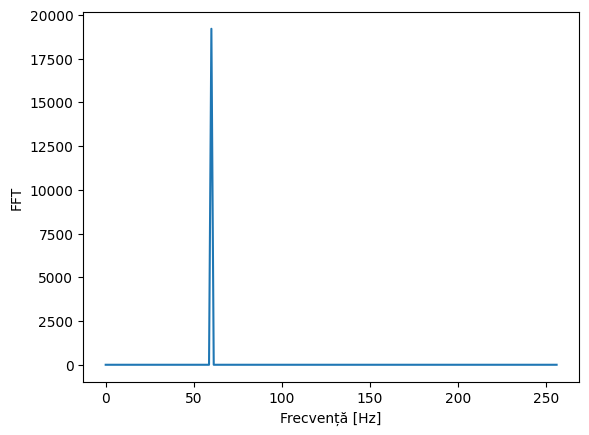

In [12]:
# Transformarea vectorului de frecvență într-un vector unidimensional
yf = np.fft.rfft(y)
print(yf.shape)
xf = np.fft.rfftfreq(len(y),1/fs)
xf = np.reshape(xf, (xf.shape[1],))
print(xf.shape)


# Reprezentarea spectrului
plt.figure()
plt.plot(xf, np.abs(yf))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.show()


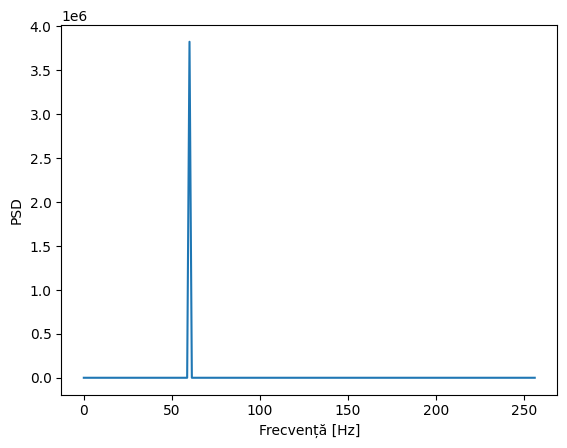

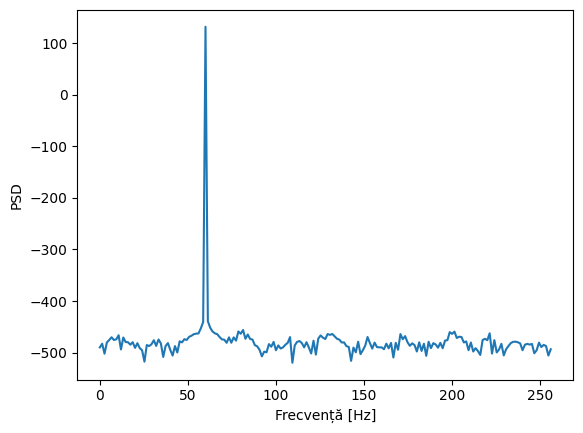

In [13]:
#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

plt.figure()
plt.plot(xf,pf_log)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

#Exercițiu 2
Pentru semnalul data5Mix60 cu frecvența de eșantionare 512Hz:

1.   Calculați și reprezentați grafic transformata fourier
2.   Reprezentați grafic puterea densității spectrale
3.   Care sunt frecvențele dominante prezente în semnal?





(384, 1)
(384,)


ValueError: x and y must have same first dimension, but have shapes (1, 193) and (193,)

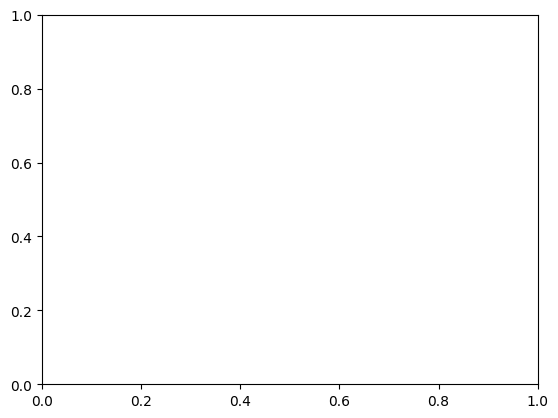

In [17]:
y = data5Mix60

#remodelarea datelor pentru functia numpy fft
print(y.shape)
y = np.reshape(y,(len(y),))
print(y.shape)
#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

plt.figure()
plt.plot(xf,np.abs(yf))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.show()

#punctul 2 puterea densitatii spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

plt.figure()
plt.plot(xf,pf_log)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

#Semnale EEG
Semnale nestationare - conținutul în frecvență se modifică în timp

Variabilitare intra și inter indivizi

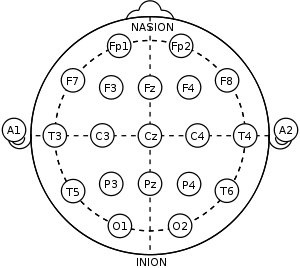

In [16]:
# definirea unor funcții pentru citirea datelor de tip struct din Matlab
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = sio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [18]:
#citirea datelor din fișierul .mat
#vizualizarea
z = loadmat('S1.mat')
data = z['data']
print(data.keys())

dict_keys(['EEG', 'Suppl_info'])


<ipython-input-16-a306e202c599>:18: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
<ipython-input-16-a306e202c599>:29: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(elem, sio.matlab.mio5_params.mat_struct):


In [19]:
#informații suplimentare
info = data['Suppl_info']
print(info)

{'Participant_id': 'S1', 'Age': 58, 'Gender': 'male', 'Channel': array([['1', '-17.926', '0.51499', 'FP1'],
       ['2', '0', '0.50669', 'FPZ'],
       ['3', '17.926', '0.51499', 'FP2'],
       ['4', '-22.461', '0.42113', 'AF3'],
       ['5', '22.461', '0.42113', 'AF4'],
       ['6', '-53.913', '0.52808', 'F7'],
       ['7', '-49.405', '0.43159', 'F5'],
       ['8', '-39.947', '0.34459', 'F3'],
       ['9', '-23.493', '0.27903', 'F1'],
       ['10', '0', '0.25338', 'FZ'],
       ['11', '23.493', '0.27878', 'F2'],
       ['12', '39.897', '0.3445', 'F4'],
       ['13', '49.405', '0.43128', 'F6'],
       ['14', '53.867', '0.52807', 'F8'],
       ['15', '-71.948', '0.53192', 'FT7'],
       ['16', '-69.332', '0.40823', 'FC5'],
       ['17', '-62.425', '0.28822', 'FC3'],
       ['18', '-44.925', '0.18118', 'FC1'],
       ['19', '0', '0.12662', 'FCZ'],
       ['20', '44.925', '0.18118', 'FC2'],
       ['21', '62.425', '0.28822', 'FC4'],
       ['22', '69.332', '0.40823', 'FC6'],
       ['23',

In [20]:
fs = info['Srate']
channels = info['Channel']
frec_stimulare = info['Frequency']


In [21]:
eeg = data['EEG']
print(eeg)
print(eeg.keys())
print(type(eeg))

{'Epoch': array([[[[-2.05650854e+00, -1.29095955e+01,  1.51171913e+01, ...,
           1.97392197e+01,  6.26430016e+01,  3.40900040e+01],
         [-7.03572083e+00,  1.51828751e-01,  3.02560306e+00, ...,
          -1.11251631e+01, -1.36338959e+01, -4.24649010e+01],
         [ 1.07318020e+00,  2.67105923e+01, -1.50853128e+01, ...,
          -4.10486221e+00,  2.18921041e+00, -1.43756914e+01],
         ...,
         [-1.78186760e+01,  1.73637829e+01, -2.84865723e+01, ...,
           3.66820633e-01,  6.78114033e+00,  4.65968943e+00],
         [-1.92328777e+01, -7.90428782e+00, -2.37493382e+01, ...,
           1.43660545e+01,  2.51407051e+00,  1.39132366e+01],
         [ 2.36995196e+00, -3.22295070e+00,  2.91262102e+00, ...,
          -1.23544712e+01, -4.92331409e+00, -2.66256332e+01]],

        [[-3.74189663e+00, -1.72465000e+01,  7.89094353e+00, ...,
           7.68736839e+00,  7.29516373e+01,  5.23045616e+01],
         [ 3.79393959e+00, -1.03110104e+01, -1.49110956e+01, ...,
          -3

In [22]:
eeg_epochs = eeg['Epoch']
print(type(eeg_epochs))

<class 'numpy.ndarray'>


In [23]:
print(np.shape(eeg_epochs))

(64, 1500, 9, 7)


In [24]:
print(np.shape(channels))

(64, 4)


In [25]:
print(np.shape(frec_stimulare))

(9,)


#Semnale EEG în timp

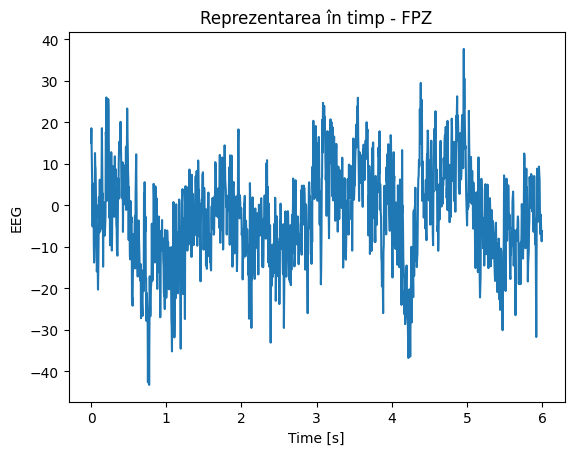

In [ ]:
#reprezentarea în timp a canalului FPZ
data = eeg_epochs[1,:,3,3]
fs = 250

t = np.arange(0.0, (len(data))/fs, 1/fs)

plt.figure()
plt.plot(t,data)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp - ' +str(channels[1][3]))
plt.show()


#Semnale EEG în frecvență

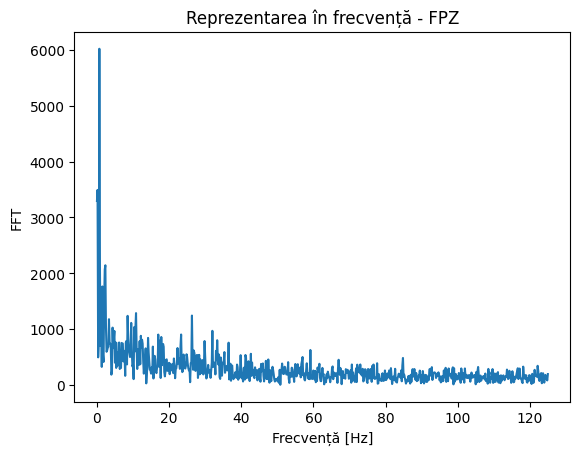

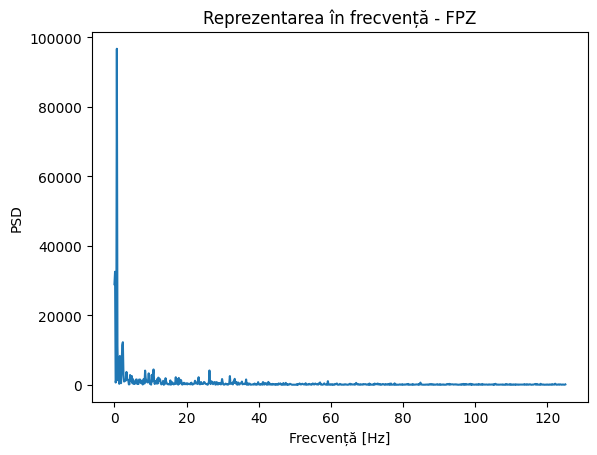

In [ ]:
#reprezentarea în frecvență a canalului FPZ
y = eeg_epochs[1,:,3,3]
y = np.reshape(y,(len(y),))

#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

plt.figure()
plt.plot(xf,np.abs(yf))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[1][3]))
plt.show()

#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[1][3]))
plt.show()


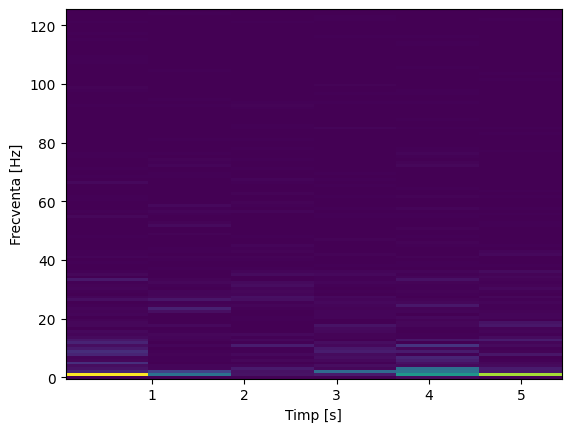

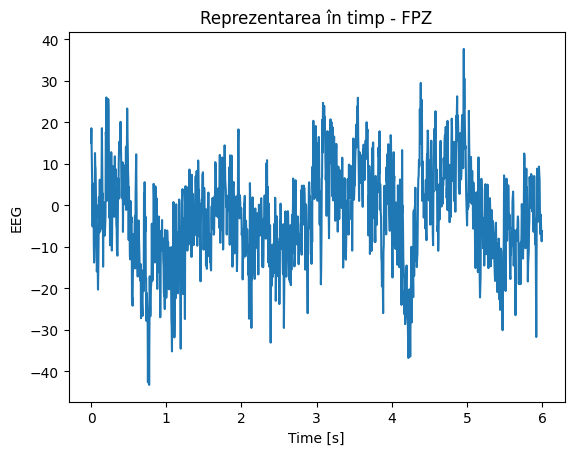

In [ ]:
#spectrograma canalului FPZ
f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frecventa [Hz]')
plt.xlabel('Timp [s]')
plt.show()

t = np.arange(0.0, (len(data))/fs, 1/fs)

plt.figure()
plt.plot(t,data)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp - ' +str(channels[1][3]))
plt.show()

#Exercițiu 3a
Alegeți două semnale EEG din setul de date propus în variabila  - un semnal din zona frontală și unul din zona occipitală.

1.   Reprezentați în timp cele două semnale.
2.   Există diferențe observabile vizual?
3.   Reprezentați în frecvență cele două semnale. Observați vizual diferențele? Dacă da, care este cauza?
4.   Dar dacă le reprezentați cu ajutorul unei spectrograme?



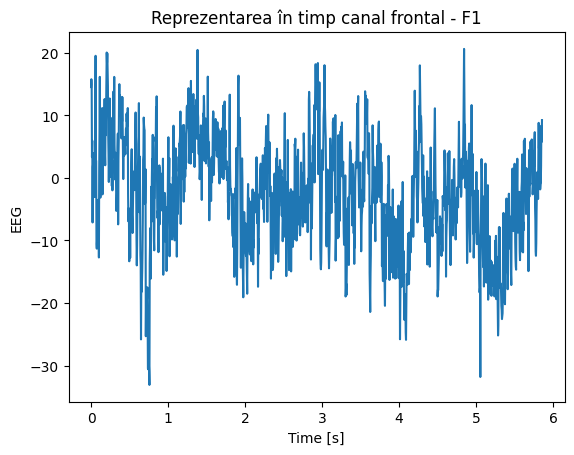

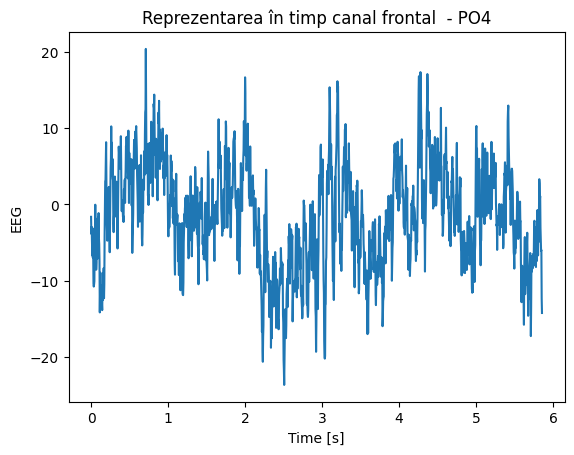

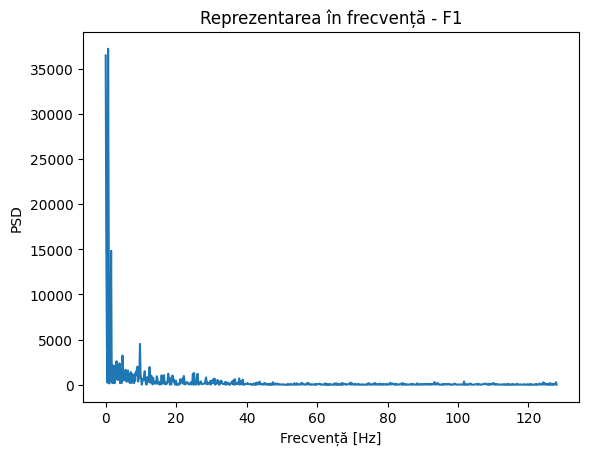

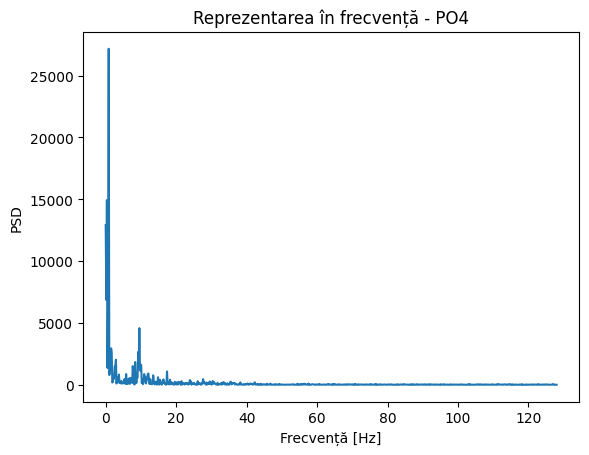

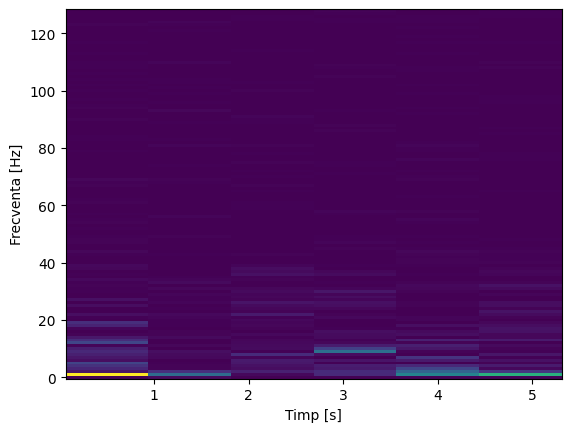

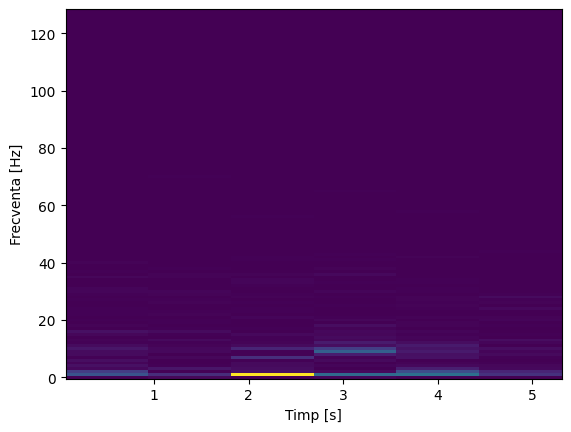

In [26]:
data_frontal= eeg_epochs[8,:,3,3]
fs = 256
t_frontal = np.arange(0.0, (len(data_frontal))/fs, 1/fs)
plt.figure()
plt.plot(t_frontal,data_frontal)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp canal frontal - ' +str(channels[8][3]))
plt.show()

#reprezentarea in timp a canalului occipital
data_occipital = eeg_epochs[56,:,3,3]
fs = 256
t_occipital= np.arange(0.0, (len(data_occipital))/fs, 1/fs)
plt.figure()
plt.plot(t_occipital,data_occipital)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp canal frontal  - ' +str(channels[56][3]))
plt.show()

#punctul 2
#Se observa fluctuații rapide și variate in semnalele din zona frontala.

#punctul 3
#calcularea transformatei Fourier
yf_frontal = np.fft.rfft(data_frontal)
#vectorul frecvență
xf_frontal = np.fft.rfftfreq(len(data_frontal),1/fs)
#puterea densității spectrale
pf_frontal = (2/len(xf_frontal))*np.abs(yf_frontal)**2
pf_log = 20*np.log10(pf_frontal)

plt.figure()
plt.plot(xf_frontal,pf_frontal)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[8][3]))
plt.show()

#calcularea transformatei Fourier
yf_occipital = np.fft.rfft(data_occipital)
#vectorul frecvență
xf_occipital = np.fft.rfftfreq(len(data_occipital),1/fs)
#puterea densității spectrale
pf_occipital = (2/len(xf_occipital))*np.abs(yf_occipital)**2
pf_log = 20*np.log10(pf_occipital)

plt.figure()
plt.plot(xf_occipital,pf_occipital)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[56][3]))
plt.show()
#spectograma
f, t, Sxx = signal.spectrogram(data_frontal, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frecventa [Hz]')
plt.xlabel('Timp [s]')
plt.show()

f1, t1, Sxx1 = signal.spectrogram(data_occipital, fs)
plt.pcolormesh(t1, f1, Sxx1)
plt.ylabel('Frecventa [Hz]')
plt.xlabel('Timp [s]')
plt.show()

#Exercițiu 3b

Reprezentați grafic atât în timp cât și în frecvență semnalele înregistrate pe canalul PO4 pentru toate frecvențele de stimulare. Care semnale arată un răspuns SSVEP mai puternic?

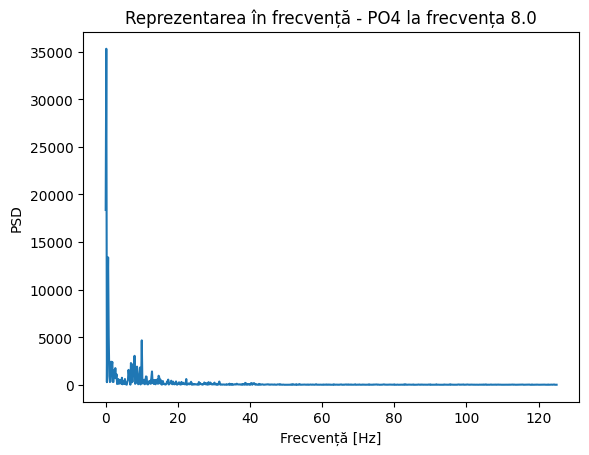

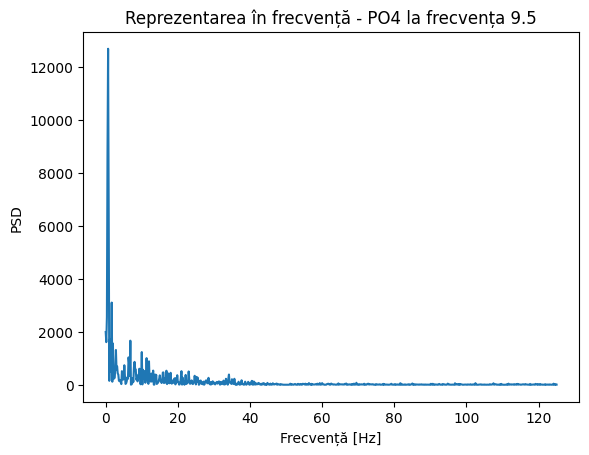

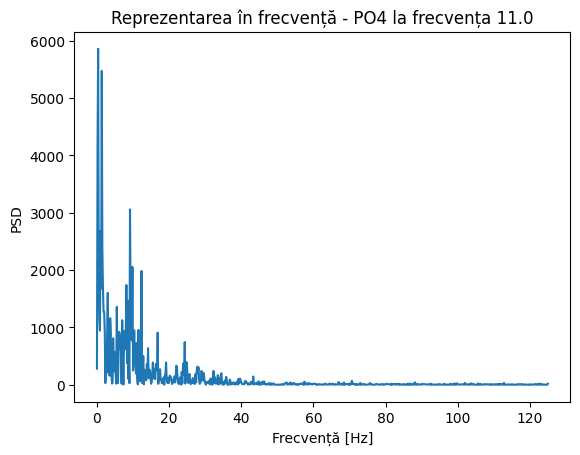

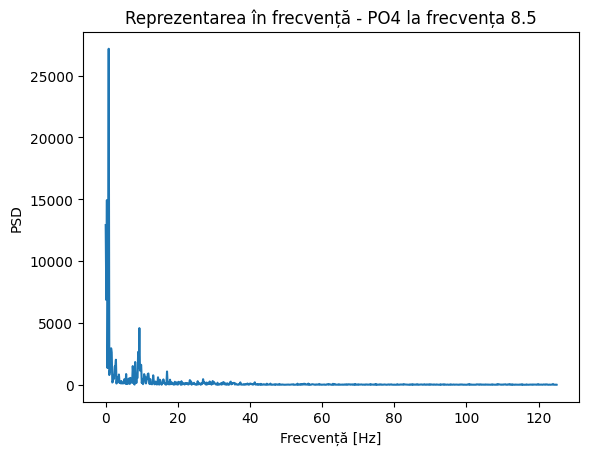

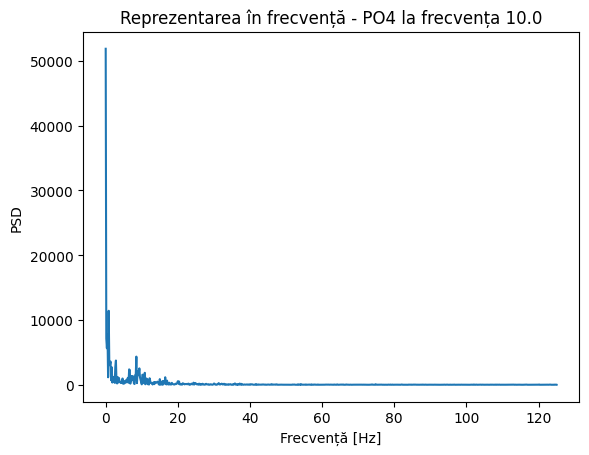

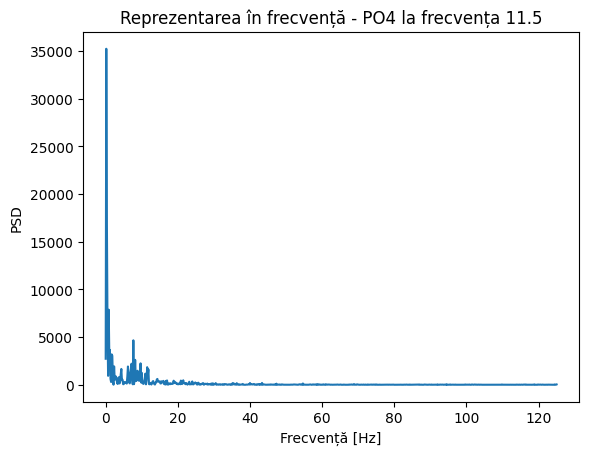

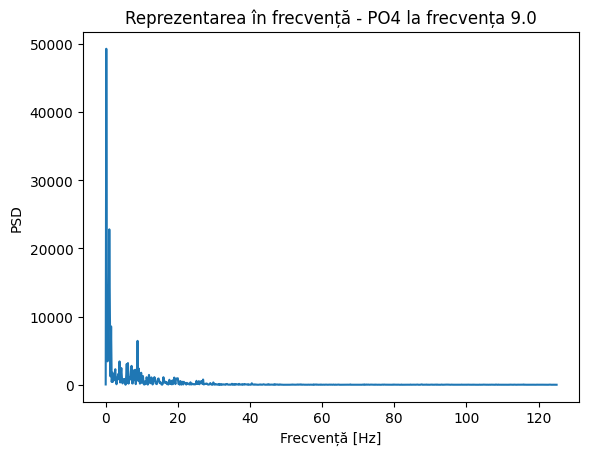

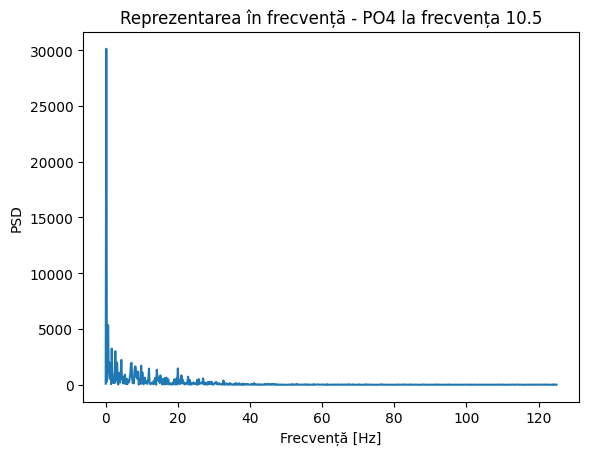

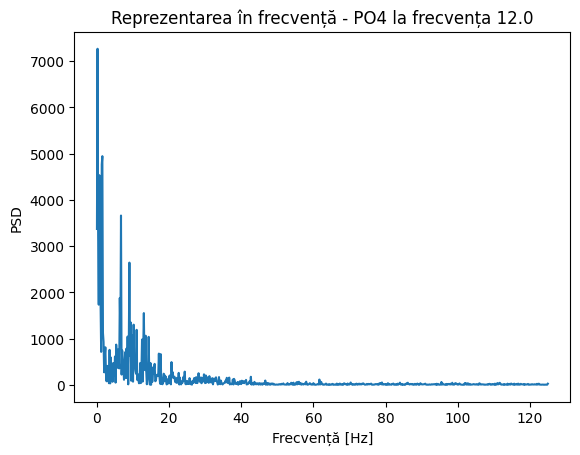

In [ ]:
for i in range(0, 9):
    data = eeg_epochs[56, :, i, 3]
    t = np.arange(0.0, (len(data))/fs, 1/fs)

    # Calcularea transformatei Fourier
    yf = np.fft.rfft(data)

    # Vectorul frecvență
    xf = np.fft.rfftfreq(len(data), 1/fs)

    # Calcularea puterii densității spectrale
    pf = (2/len(xf)) * np.abs(yf)**2  # Puterea în frecvență
    pf_log = 20 * np.log10(pf)  # Puterea logaritmică

    plt.figure()
    plt.plot(xf, pf)
    plt.ylabel('PSD')
    plt.xlabel('Frecvență [Hz]')
    plt.title('Reprezentarea în frecvență - ' + str(channels[56][3]) + ' la frecvența ' + str(frec_stimulare[i]))
    plt.show()


#Descriptori în timp și frecvență



##Reprezentare în timp
- descriptori care caracterizează amplitudinea - amplitudine maximă, minimă, medie etc.
- descriptori statistici - aplatizarea distribuției (kurtosis), asimetria distribuției (skewness).

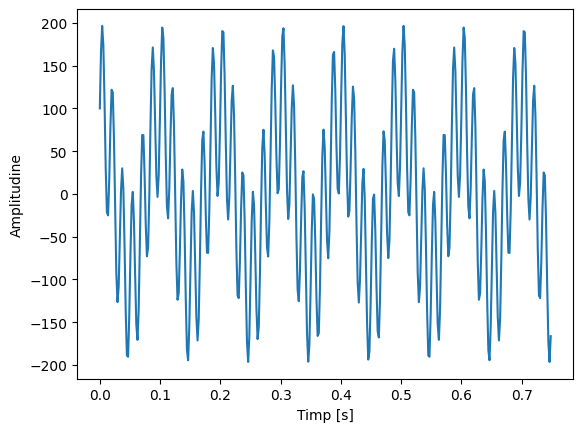

Amplitudinea maximă: 100.0
Amplitudinea minimă: -100.0
Amplitudinea medie: -1.5395092608135503e-14
Aplatizarea: [-1.5]
Asimetria: [1.88645562e-16]


In [ ]:
mat_contents = sio.loadmat('variables.mat')
data60 = mat_contents['data60']

fs = 512

t = np.arange(0.0, (len(data5Mix60))/fs, 1/fs)

plt.figure()
plt.plot(t,data5Mix60)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

Amax = np.max(data60)
Amin = np.min(data60)
Amean = np.mean(data60)
Akurtosis = kurtosis(data60)
Askew = skew(data60)

print('Amplitudinea maximă: ' + str(Amax))
print('Amplitudinea minimă: ' + str(Amin))
print('Amplitudinea medie: ' + str(Amean))
print('Aplatizarea: ' + str(Akurtosis))
print('Asimetria: ' + str(Askew))

##Reprezentare în frecvență
- puterea maximă în frecvență
- puterea medie în anumite benzi de frecvență (alpha, beta, theta etc.)

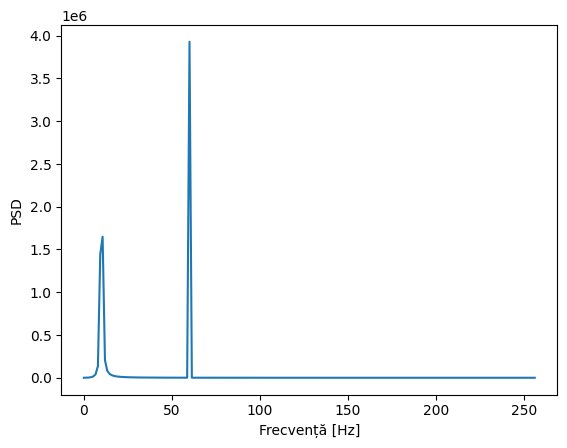

Puterea maximă este de 3927189.1196292685la frecventa de 60 Hz


<ipython-input-36-8f92460d3aac>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Puterea maximă este de ' +str(Pmax)+ 'la frecventa de ' + str(int(Fmax)) +' Hz' )


In [ ]:
mat_contents = sio.loadmat('variables.mat')
data5Mix60 = mat_contents['data5Mix60']

y = np.reshape(data5Mix60,(len(data5Mix60),))

#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

Pmax = np.max(pf)

index_max = np.where(pf == Pmax)
Fmax = xf[index_max]

print('Puterea maximă este de ' +str(Pmax)+ 'la frecventa de ' + str(int(Fmax)) +' Hz' )







#Exercițiu 4a
Încărcați două semnale EEG - dintr-un canal frontal și unul occipital la frecvența de stimulare de 9Hz.
1.   Pentru fiecare din cele două semnale calculați următorii descriptori în timp și afișați rezultatele - amplitudine maximă, minimă,medie, skew, kurtosis.
2.   Se pot diferenția cele două condiții din descriptorii aleși? Motivați răspunsul.
3.   Ce alti descriptori ar mai putea diferenția cele două stări? Implementați încă doi descriptori care ar putea fi utilizați în domeniul timp (căutați în literatură, ex - Tautan et. al 2018, Shoeb & Guttag 2010, Acharya et. al 2013 )






Amplitudinea maximă pentru F4: 29.650197982788086
Amplitudinea minimă pentru F4: -42.53592300415039
Amplitudinea medie pentru F4: 0.4252218218551328
Aplatizarea pentru F4: -0.027674896801370696
Asimetria pentru F4: -0.17870005974669267


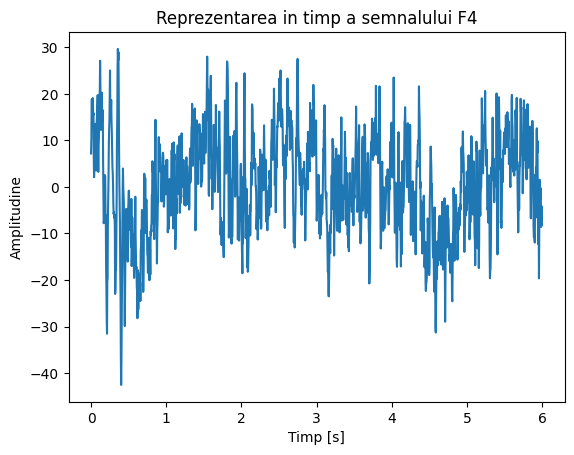



Amplitudinea maximă pentru O2: 35.49515914916992
Amplitudinea minimă pentru O2: -33.455406188964844
Amplitudinea medie pentru O2: -0.39309342254991253
Aplatizarea pentru O2: -0.3205959019209246
Asimetria pentru O2: 0.12972853499154668


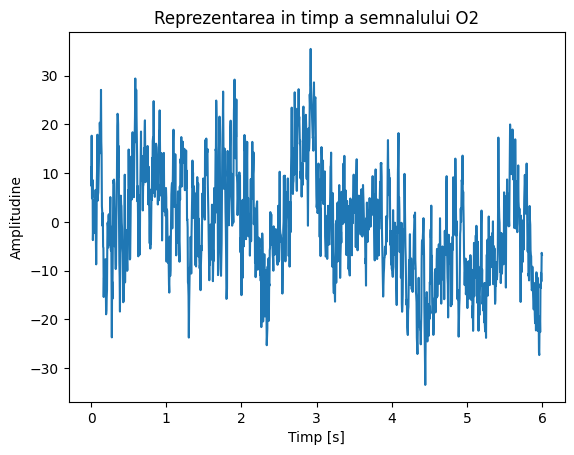

In [29]:
data_F4 = eeg_epochs[11, :, 6, 3]
data_O2 = eeg_epochs[-2, :, 6, 3]

fs = info['Srate']
t = np.arange(0.0, (len(data_F4))/fs, 1/fs)

# exercitiul 4a.1 -> calculul descriptorilor de timp

Amax_F4 = np.max(data_F4)
Amin_F4 = np.min(data_F4)
Amean_F4 = np.mean(data_F4)
Akurtosis_F4 = kurtosis(data_F4)
Askew_F4 = skew(data_F4)

print('Amplitudinea maximă pentru F4: ' + str(Amax_F4))
print('Amplitudinea minimă pentru F4: ' + str(Amin_F4))
print('Amplitudinea medie pentru F4: ' + str(Amean_F4))
print('Aplatizarea pentru F4: ' + str(Akurtosis_F4))
print('Asimetria pentru F4: ' + str(Askew_F4))

plt.figure()
plt.plot(t, data_F4)
plt.title('Reprezentarea in timp a semnalului ' + str(channels[11][3]))
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

print('\n')

Amax_O2 = np.max(data_O2)
Amin_O2 = np.min(data_O2)
Amean_O2 = np.mean(data_O2)
Akurtosis_O2 = kurtosis(data_O2)
Askew_O2 = skew(data_O2)

print('Amplitudinea maximă pentru O2: ' + str(Amax_O2))
print('Amplitudinea minimă pentru O2: ' + str(Amin_O2))
print('Amplitudinea medie pentru O2: ' + str(Amean_O2))
print('Aplatizarea pentru O2: ' + str(Akurtosis_O2))
print('Asimetria pentru O2: ' + str(Askew_O2))

plt.figure()
plt.plot(t, data_O2)
plt.title('Reprezentarea in timp a semnalului ' + str(channels[-2][3]))
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

#Exercițiu 4b
Încărcați cele două semnale EEG - eegnormal și eegseizure
1.   Reprezentați semnalele în frecvență
2.   Extrageți, afișați și comparați puterea maximă și frecvența corespunzătoare.
3.   În funcție de activitatea cognitivă, semnalele EEG au diferite caracteristici în diferite benzi de frecvență. Puterea în frecvență variază de la individ la indvid și este de asemenea variabilă în timp. Extrageți puterea medie in benzile theta (4-8Hz) și delta (0.5-3Hz) pentru cele două semnale EEG. Afișați și comparați rezultatele.



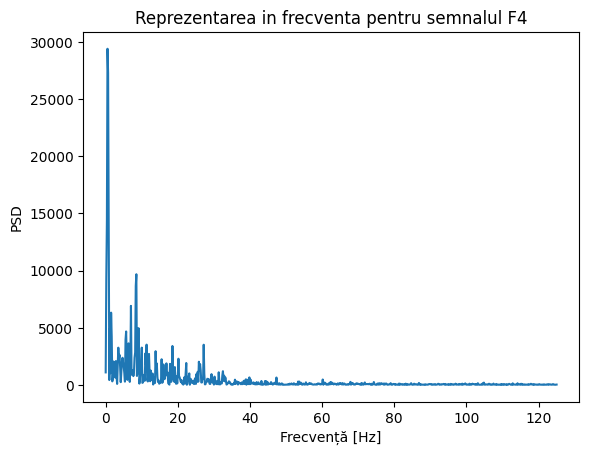

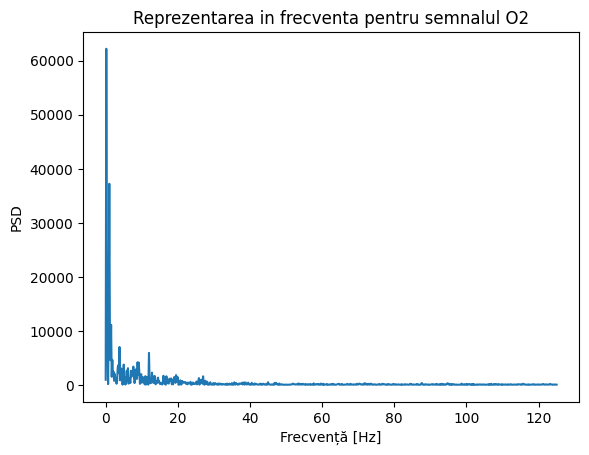

Puterea maximă pentru F4 este de 29420.851747186924 la frecventa de [0.5] Hz
Puterea maximă pentru O2 este de 62183.802456621845 la frecventa de [0.16666667] Hz
Puterea medie in banda theta pentru F4: 1814.6232356232904
Puterea medie in banda delta pentru F4: 6416.575689920772
Puterea medie in banda theta pentru O2: 1542.7367581071674
Puterea medie in banda delta pentru O2: 6480.656052210104


In [30]:
y_F4 = np.reshape(data_F4,(len(data_F4),))

yf_F4 = np.fft.rfft(y_F4)
xf_F4 = np.fft.rfftfreq(len(y_F4),1/fs)
pds_F4 = (2/len(xf_F4))*np.abs(yf_F4)**2

plt.figure()
plt.plot(xf_F4, pds_F4)
plt.title('Reprezentarea in frecventa pentru semnalul ' + str(channels[11][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

y_O2 = np.reshape(data_O2,(len(data_O2),))

yf_O2 = np.fft.rfft(y_O2)
xf_O2 = np.fft.rfftfreq(len(y_O2),1/fs)
pds_O2 = (2/len(xf_O2))*np.abs(yf_O2)**2

plt.figure()
plt.plot(xf_O2, pds_O2)
plt.title('Reprezentarea in frecventa pentru semnalul ' + str(channels[-2][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

# exercitiul 4b.2 -> determinarea puterii maxime si frecventei corespunzatoare

Pmax_F4 = np.max(pds_F4)

index_max_F4 = np.where(pds_F4 == Pmax_F4)
Fmax_F4 = xf_F4[index_max_F4]

print('Puterea maximă pentru F4 este de ' +str(Pmax_F4)+ ' la frecventa de ' + str(Fmax_F4) +' Hz' )

Pmax_O2 = np.max(pds_O2)

index_max_O2 = np.where(pds_O2 == Pmax_O2)
Fmax_O2 = xf_O2[index_max_O2]

print('Puterea maximă pentru O2 este de ' +str(Pmax_O2)+ ' la frecventa de ' + str(Fmax_O2) +' Hz' )
index_theta_F4 = np.where((xf_F4 >= 4) & (xf_F4 <= 8))[0]
theta_F4 = pds_F4[index_theta_F4[0]:index_theta_F4[-1]]
theta_F4_mean = np.mean(theta_F4)
print('Puterea medie in banda theta pentru F4: ' + str(theta_F4_mean))

index_delta_F4 = np.where((xf_F4 >= 0.5) & (xf_F4 <= 3))[0]
delta_F4 = pds_F4[index_delta_F4[0]:index_delta_F4[-1]]
delta_F4_mean = np.mean(delta_F4)
print('Puterea medie in banda delta pentru F4: ' + str(delta_F4_mean))

index_theta_O2 = np.where((xf_O2 >= 4) & (xf_O2 <= 8))[0]
theta_O2 = pds_O2[index_theta_O2[0]:index_theta_O2[-1]]
theta_O2_mean = np.mean(theta_O2)
print('Puterea medie in banda theta pentru O2: ' + str(theta_O2_mean))

index_delta_O2 = np.where((xf_O2 >= 0.5) & (xf_O2 <= 3))[0]
delta_O2 = pds_O2[index_delta_O2[0]:index_delta_O2[-1]]
delta_O2_mean = np.mean(delta_O2)
print('Puterea medie in banda delta pentru O2: ' + str(delta_O2_mean))


#Exercițiu 4c
Pentru a evita cât mai mult posibil variabilitatea între semnale cauzată de ex de diferențe în instrumentele de înregistrare, de diferențe individuale etc., înainte de calcularea descriptorilor semnalele pot fi normalizate: valoarea este transpusă în intervalul [-1,1].
1. Încărcați cele două semnale EEG - zona frontală și zona occipitală
2. Aduceți amplitudinea celor două semnale în intervalul [-1,1]. Reprezentați grafic cele două semnale
3. Recalculați descriptorii de la Exercițiul 4a.
4. Reprezentați semnalele în frecvență. Aduceți puterea în intervalul [0,1]. Reprezentați grafic semnalele ajustate.
5. Recalculați descriptorii de la Exercițiul 4b.
6. Comparați descriptorii pentru semnalul normal și cel epileptic. Se păstrează aceleași diferențe ca și în exercițiile anterioare?


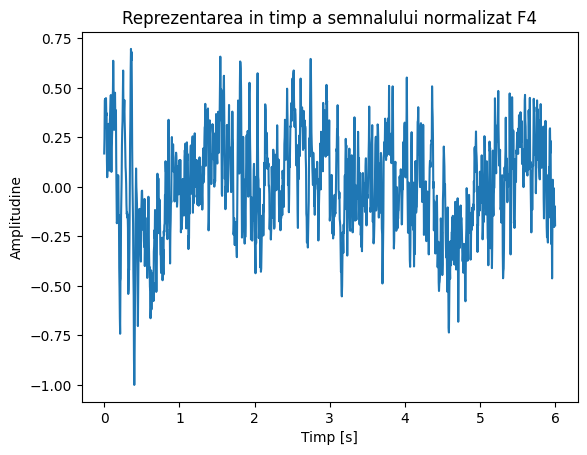

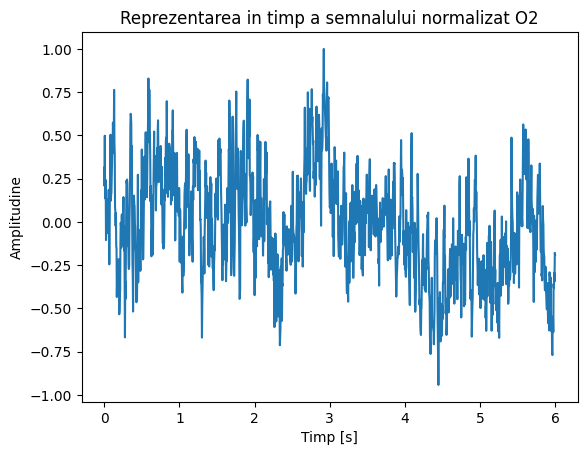

Amplitudinea maximă pentru F4 normalizat: 0.6970625271231332
Amplitudinea minimă pentru F4 normalizat: -1.0
Amplitudinea medie pentru F4 normalizat: 0.00999676959669224
Aplatizarea pentru F4 normalizat: -0.02767489680137114
Asimetria pentru F4 normalizat: -0.1787000597466929


Amplitudinea maximă pentru O2 normalizat: 1.0
Amplitudinea minimă pentru O2 normalizat: -0.9425343340021964
Amplitudinea medie pentru O2 normalizat: -0.011074564306020458
Aplatizarea pentru O2 normalizat: -0.32059590192092635
Asimetria pentru O2 normalizat: 0.12972853499154655


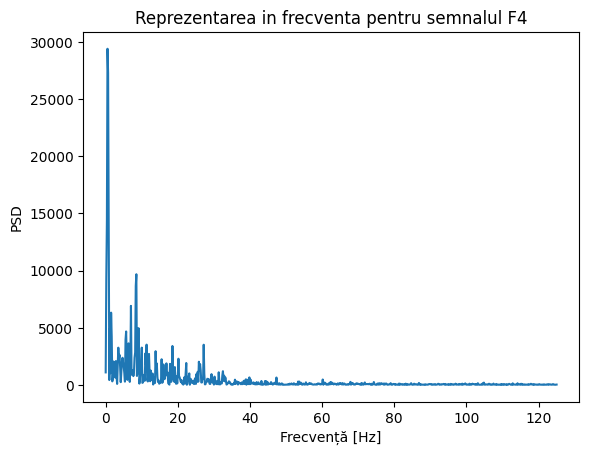

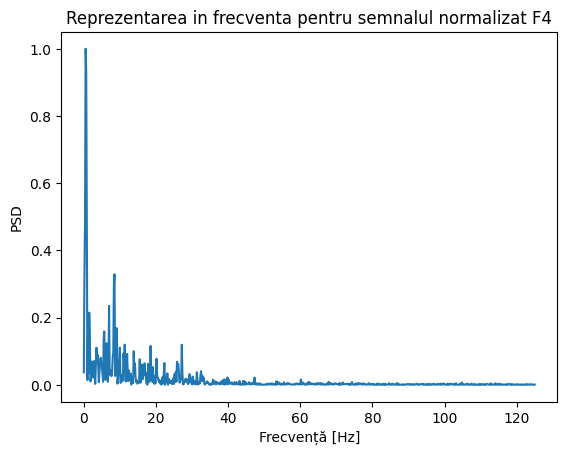

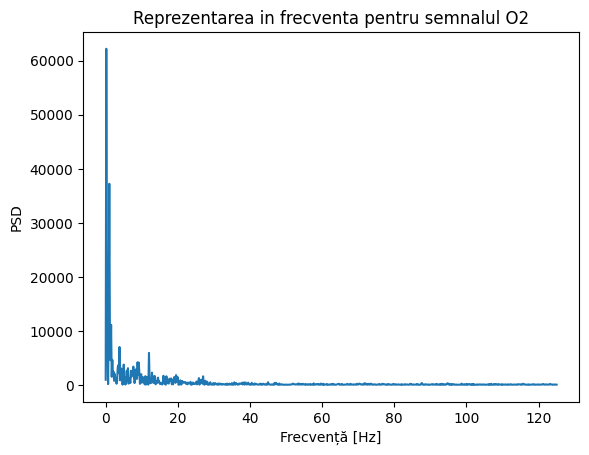

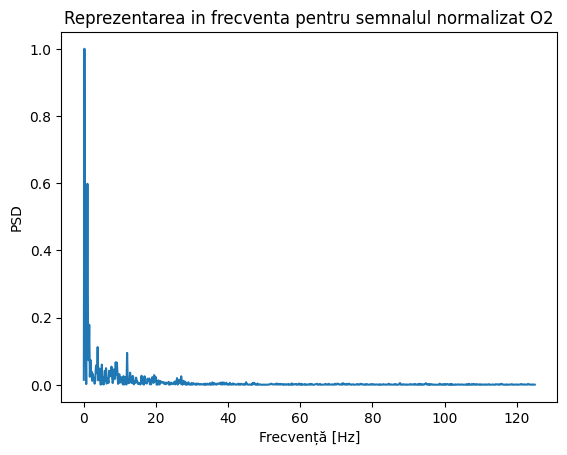

Puterea maximă pentru F4 este de 1.0 la frecventa de [0.5] Hz
Puterea medie in banda theta pentru F4: 0.06167813397165824
Puterea medie in banda delta pentru F4: 0.21809619058816992


Puterea maximă pentru O2 este de 1.0 la frecventa de [0.16666667] Hz
Puterea medie in banda theta pentru O2: 0.024809302377147954
Puterea medie in banda delta pentru O2: 0.10421775118578311


In [33]:
data_F4 = eeg_epochs[11, :, 6, 3]
data_O2 = eeg_epochs[-2, :, 6, 3]

fs = info['Srate']
t = np.arange(0.0, (len(data_F4))/fs, 1/fs)

#4c.2

Amax_F4 = np.max(abs(data_F4))
data_F4_norm = data_F4/Amax_F4

plt.figure()
plt.plot(t, data_F4_norm)
plt.title('Reprezentarea in timp a semnalului normalizat ' + str(channels[11][3]))
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

Amax_O2 = np.max(abs(data_O2))
data_O2_norm = data_O2/Amax_O2

plt.figure()
plt.plot(t, data_O2_norm)
plt.title('Reprezentarea in timp a semnalului normalizat ' + str(channels[-2][3]))
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

# 4c.3

Amax_F4_norm = np.max(data_F4_norm)
Amin_F4_norm = np.min(data_F4_norm)
Amean_F4_norm = np.mean(data_F4_norm)
Akurtosis_F4_norm = kurtosis(data_F4_norm)
Askew_F4_norm = skew(data_F4_norm)

print('Amplitudinea maximă pentru F4 normalizat: ' + str(Amax_F4_norm))
print('Amplitudinea minimă pentru F4 normalizat: ' + str(Amin_F4_norm))
print('Amplitudinea medie pentru F4 normalizat: ' + str(Amean_F4_norm))
print('Aplatizarea pentru F4 normalizat: ' + str(Akurtosis_F4_norm))
print('Asimetria pentru F4 normalizat: ' + str(Askew_F4_norm))

print('\n')

Amax_O2_norm = np.max(data_O2_norm)
Amin_O2_norm = np.min(data_O2_norm)
Amean_O2_norm = np.mean(data_O2_norm)
Akurtosis_O2_norm = kurtosis(data_O2_norm)
Askew_O2_norm = skew(data_O2_norm)

print('Amplitudinea maximă pentru O2 normalizat: ' + str(Amax_O2_norm))
print('Amplitudinea minimă pentru O2 normalizat: ' + str(Amin_O2_norm))
print('Amplitudinea medie pentru O2 normalizat: ' + str(Amean_O2_norm))
print('Aplatizarea pentru O2 normalizat: ' + str(Akurtosis_O2_norm))
print('Asimetria pentru O2 normalizat: ' + str(Askew_O2_norm))
y_F4 = np.reshape(data_F4,(len(data_F4),))

yf_F4 = np.fft.rfft(y_F4)
xf_F4 = np.fft.rfftfreq(len(y_F4),1/fs)
pds_F4 = (2/len(xf_F4))*np.abs(yf_F4)**2

plt.figure()
plt.plot(xf_F4, pds_F4)
plt.title('Reprezentarea in frecventa pentru semnalul ' + str(channels[11][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

pds_F4_norm = pds_F4/np.max(pds_F4)
plt.figure()
plt.plot(xf_F4, pds_F4_norm)
plt.title('Reprezentarea in frecventa pentru semnalul normalizat ' + str(channels[11][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

y_O2 = np.reshape(data_O2,(len(data_O2),))

yf_O2 = np.fft.rfft(y_O2)
xf_O2 = np.fft.rfftfreq(len(y_O2),1/fs)
pds_O2 = (2/len(xf_O2))*np.abs(yf_O2)**2

plt.figure()
plt.plot(xf_O2, pds_O2)
plt.title('Reprezentarea in frecventa pentru semnalul ' + str(channels[-2][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

pds_O2_norm = pds_O2/np.max(pds_O2)
plt.figure()
plt.plot(xf_O2, pds_O2_norm)
plt.title('Reprezentarea in frecventa pentru semnalul normalizat ' + str(channels[-2][3]))
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

#4c.5

Pmax_F4_norm = np.max(pds_F4_norm)

index_max_F4_norm = np.where(pds_F4_norm == Pmax_F4_norm)
Fmax_F4_norm = xf_F4[index_max_F4_norm]
print('Puterea maximă pentru F4 este de ' +str(Pmax_F4_norm)+ ' la frecventa de ' + str(Fmax_F4_norm) +' Hz' )

index_theta_F4_norm = np.where((xf_F4 >= 4) & (xf_F4 <= 8))[0]
theta_F4_norm = pds_F4_norm[index_theta_F4_norm[0]:index_theta_F4_norm[-1]]
print(f'Puterea medie in banda theta pentru F4: {np.mean(theta_F4_norm)}')

index_delta_F4_norm = np.where((xf_F4 >= 0.5) & (xf_F4 <= 3))[0]
delta_F4_norm = pds_F4_norm[index_delta_F4_norm[0]:index_delta_F4_norm[-1]]
print(f'Puterea medie in banda delta pentru F4: {np.mean(delta_F4_norm)}')

print('\n')

Pmax_O2_norm = np.max(pds_O2_norm)

index_max_O2_norm = np.where(pds_O2_norm == Pmax_O2_norm)
Fmax_O2_norm = xf_O2[index_max_O2_norm]
print('Puterea maximă pentru O2 este de ' +str(Pmax_O2_norm)+ ' la frecventa de ' + str(Fmax_O2_norm) +' Hz' )

index_theta_O2_norm = np.where((xf_O2 >= 4) & (xf_O2 <= 8))[0]
theta_O2_norm = pds_O2_norm[index_theta_O2_norm[0]:index_theta_O2_norm[-1]]
print(f'Puterea medie in banda theta pentru O2: {np.mean(theta_O2_norm)}')

index_delta_O2_norm = np.where((xf_O2 >= 0.5) & (xf_O2 <= 3))[0]
delta_O2_norm = pds_O2_norm[index_delta_O2_norm[0]:index_delta_O2_norm[-1]]
print(f'Puterea medie in banda delta pentru O2: {np.mean(delta_O2_norm)}')

#Salvarea datelor in fisier
Salvarea descriptorilor în fișiere csv/în formate mai ușor de manipulat în probleme de clasificare ex. panda



pentru a vizualiza fișierul creat și a salva rezultatele, accesați fișierul din meniul din stânga și salvați fișierul local pe calculator pentru a-l putea utiliza din nou.

#Exercițiu 5
Pentru semnalul EEG normal și cel epileptic, calculați toți descriptori în timp și frecvență de la exercițiile anterioare.
1.   Creați un dataframe panda care să conțină toți descriptorii calculați.
2.   În noul dataframe creat, adăugați o coloană care să reprezinte clasa din care fac parte semnalele astfel:
*   EEG frontal - 0
*   EEG occipital - 1
3.   Salvați dataframe-ul creat într-un fișier .csv




